In [1]:
# Imports
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import color
%matplotlib inline  

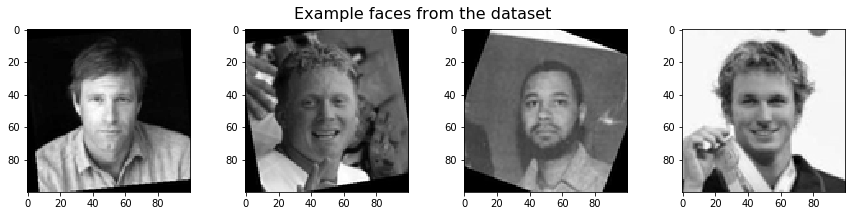

In [2]:
# Load images
counter = 0
cwd = os.getcwd()
faces_list = []
fig, axs = plt.subplots(1,4,figsize=(15,3))
for dirpath, dirnames, filenames in os.walk(cwd): #  + "/LFW_faces"
    for filename in [f for f in filenames if f.endswith(".jpg")]:
        counter = counter + 1
        cur_file_fullpath = os.path.join(dirpath, filename) # Get full file path of .jpg files
        cur_img = Image.open(cur_file_fullpath) # Open image
        cur_img = cur_img.resize((100,100), Image.ANTIALIAS) # Resize to 100x100 pixels
        cur_img = np.array(cur_img) # Convert to array type
        cur_img = color.rgb2gray(cur_img) # Convery to greyscale
        if counter < 5: # plot 4 faces. faces pixel values range from 0-1
            ax = plt.subplot(1,4,counter)
            plt.imshow(cur_img, cmap='gray')
        cur_img = cur_img.flatten() # Linearize
        faces_list.append(cur_img) # Append file data to a list
fig.suptitle("Example faces from the dataset", fontsize=16)
faces_matrix = np.vstack(faces_list) # Convert list of individual data file to data matrix

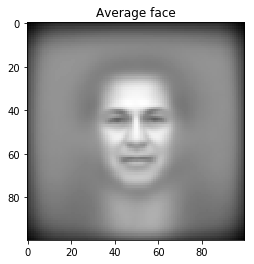

In [3]:
# Show the average face, and center data
avg_face = np.mean(faces_matrix,axis=0)
plt.imshow(avg_face.reshape(100,100),cmap='gray'); 
plt.title('Average face')
faces_matrix_centered = faces_matrix-avg_face

In [4]:
# Calculate covariance matrix
face_cov = np.cov(faces_matrix_centered.T) #np.cov expects features as rows and observations as columns, so transposed

In [5]:
# Calculate eigenvalues and eigenvectors
eigen_vals, eigen_vecs = np.linalg.eig(face_cov)

In [6]:
# Sort eigenvectors and eigenvalues
idx = eigen_vals.argsort()[::-1]   
eigen_vals_sorted = eigen_vals[idx]
eigen_vecs_sorted = eigen_vecs[:,idx]

Text(0,0.5,u'Cumulative fraction of variance explained by PCs')

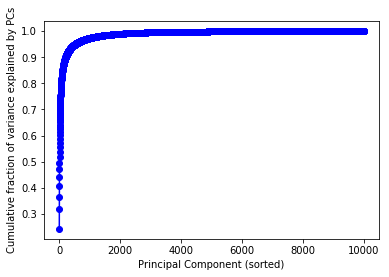

In [7]:
# Cumulative fraction of variance explaineded by PCs
eigen_vals_sorted_cum = np.cumsum(eigen_vals_sorted)/sum(eigen_vals_sorted)
plt.plot(eigen_vals_sorted_cum,marker='o',color='b');
plt.xlabel('Principal Component (sorted)')
plt.ylabel('Cumulative fraction of variance explained by PCs')

In [8]:
# First 204 PCs explain 90% of variance
eigen_vals_sorted_cum[204]

0.9001367547786543

Text(0.5,0.98,u'First 10 eigenfaces')

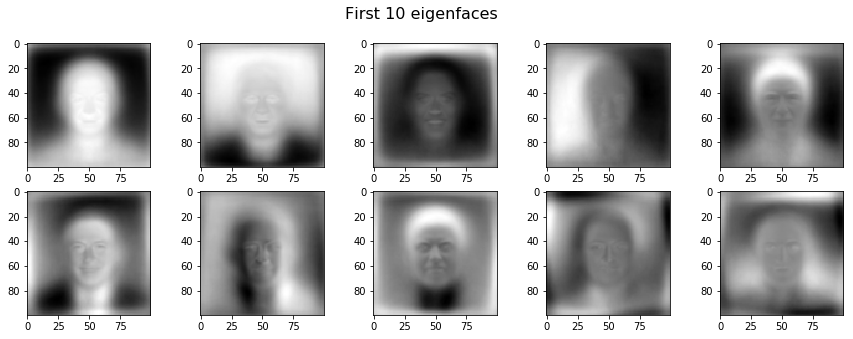

In [9]:
# Visualize first 10 PCs / eigenfaces
fig, axs = plt.subplots(2,5,figsize=(15,5))
for i in np.arange(10):
    ax = plt.subplot(2,5,i+1)
    cur_img = eigen_vecs[:,i].reshape(100,100)
    plt.imshow(cur_img, cmap='gray');
fig.suptitle("First 10 eigenfaces", fontsize=16)

Text(0.5,0.98,u'Original faces (top) and reconstructed faces by projection onto 1000 PCs (bottom)')

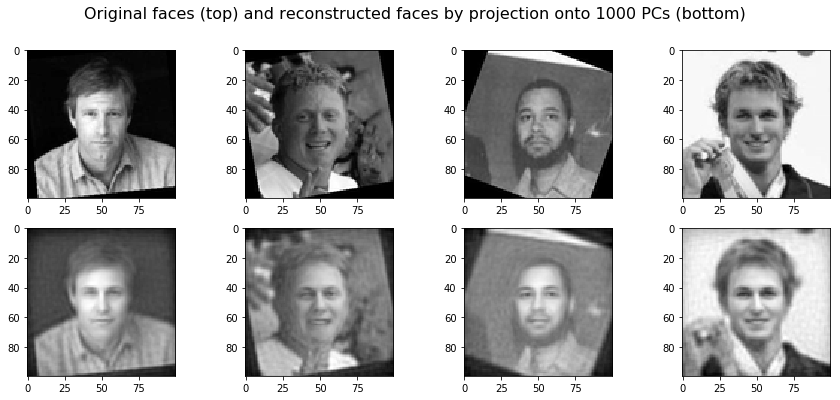

In [10]:
# Reconstructing the first 4 faces in the dataset using the first 1000 PCs
PC_reduced = 1000
num_faces = 4
selected_faces = faces_matrix[:num_faces,:] # filter to relevant data
face_scores = selected_faces.dot(eigen_vecs[:,:PC_reduced]) # Get PC scores of the images
projected_faces = face_scores.dot(eigen_vecs[:,:PC_reduced].T) # Project faces on reduced PCs

# Plot projected faces
fig, axs = plt.subplots(2,4,figsize=(15,6))
for i in np.arange(num_faces):
    ax = plt.subplot(2,4,i+1)
    plt.imshow(selected_faces[i,:].reshape(100,100),cmap='gray'); # show the original
    ax = plt.subplot(2,4,i+1+num_faces)
    plt.imshow(projected_faces[i,:].reshape(100,100)+avg_face.reshape(100,100),cmap='gray');
fig.suptitle(("Original faces (top) and reconstructed faces by projection onto " + str(PC_reduced) + " PCs (bottom)"), fontsize=16)

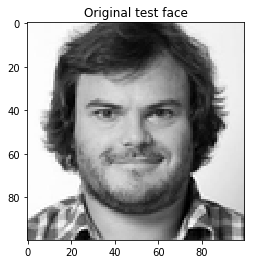

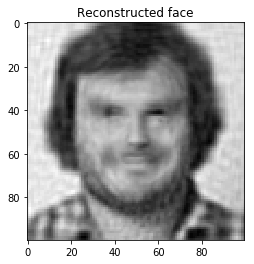

In [11]:
# Reconstructing a face withheld from the original dataset

# Load test image
cur_img = Image.open('Jack-Black.png') # Open test image (.png files excluded from original data loading set)
cur_img = cur_img.resize((100,100), Image.ANTIALIAS) # Resize to 100x100 pixels
cur_img = np.array(cur_img) # Convert to array type
cur_img = color.rgb2gray(cur_img) # Convery to greyscale
cur_img = cur_img.flatten() # Linearize
plt.imshow(cur_img.reshape(100,100),cmap='gray')
plt.title('Original test face')
plt.show()

# Project and reconstruct from reduced PCs
test_face_scores = cur_img.dot(eigen_vecs[:,:PC_reduced]) # Get PC scores of the image
test_projected_faces = test_face_scores.dot(eigen_vecs[:,:PC_reduced].T) # Project faces on reduced PCs
plt.imshow(test_projected_faces.reshape(100,100),cmap='gray');
plt.title('Reconstructed face')
plt.show()